# Tarea 2

**Autor:** Alejandro Zarate Macias  

**Curso:** Reconocimiento de Patrones (ML)

**Fecha:** 09 de Febrero 2026

---

## Introducción

Esta tarea continúa el estudio del aprendizaje supervisado enfocándose en problemas de clasificación. Se implementan y comparan modelos como KNN y Regresión Logística en escenarios de clasificación binaria y multiclase, utilizando métricas adecuadas como F1-score y matrices de confusión para evaluar su desempeño y capacidad de generalización.

---

## Pre-requisitos

- Python 3.9 o superior
- Librerías:
    - numpy
    - matplotlib
    - notebook
    - pandas
    - scikit-learn
    - kagglehub[pandas-datasets]
    - ipywidgets

---

# Problema 3

Considere el conjunto de datos de `horse.csv`. Cree un script con sklearn para resolver el problema de clasificación binaria asociado con determinar si un caballo determinado sobrevivirá o no. Utilice el modelo `KNN` de sklearn. Anote todas las suposiciones y operaciones de preprocesamiento de datos que realice. Incorpore la `puntuación F1` para explicar sus hallazgos.

### Librerías

In [1]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

### Carga de datos

In [2]:
file_path = "horse.csv"

# Obtenemos el DataFrame desde KaggleHub
df: pd.DataFrame = None
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "yasserh/horsesurvivalprognostication",
    file_path
)

### Exploración de datos

In [3]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [5]:
df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [6]:
# Exploración de la variable objetivo
print(f"Dimensiones del dataset: {df.shape}")
print("Distribución de outcome:")
print(df['outcome'].value_counts())

Dimensiones del dataset: (299, 28)
Distribución de outcome:
outcome
lived         178
died           77
euthanized     44
Name: count, dtype: int64


### Preprocesamiento de Datos

In [7]:
# Convertir outcome a binario: 
# lived=1, died/euthanized=0
df['outcome_binary'] = (df['outcome'] == 'lived').astype(int)

# Eliminar columnas no relevantes para el modelo
cols_to_drop = ['outcome', 'hospital_number', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']
df = df.drop(columns=cols_to_drop)

# Separar features y target
X = df.drop('outcome_binary', axis=1)
y = df['outcome_binary']

In [8]:
# Separar columnas numéricas y categóricas
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Imputar valores faltantes
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

X[numeric_cols] = imputer_num.fit_transform(X[numeric_cols])
X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# Codificación one-hot para categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [9]:
# División dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=14, stratify=y
)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Conjunto de entrenamiento: {X_train_scaled.shape}")
print(f"Conjunto de prueba: {X_test_scaled.shape}")

Conjunto de entrenamiento: (239, 46)
Conjunto de prueba: (60, 46)


### Entrenamiento y Evaluación del Modelo

In [10]:
# Clase para el modelo KNN
class KNNModel:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.model = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.scaler = StandardScaler()
    
    def fit(self, X_train, y_train):
        # Entrenamiento
        X_train_scaled = self.scaler.fit_transform(X_train)
        self.model.fit(X_train_scaled, y_train)
        # Métricas
        y_train_pred = self.model.predict(X_train_scaled)
        train_acc = self.model.score(X_train_scaled, y_train)
        train_f1 = f1_score(y_train, y_train_pred)
        return train_acc, train_f1
    
    def predict(self, X_test, y_test):
        # Predicción
        X_test_scaled = self.scaler.transform(X_test)
        y_pred = self.model.predict(X_test_scaled)
        # Métricas
        test_acc = self.model.score(X_test_scaled, y_test)
        test_f1 = f1_score(y_test, y_pred)
        return test_acc, test_f1

In [11]:
# Pruebas modelo base
model = KNNModel(n_neighbors=5)
train_acc, train_f1 = model.fit(X_train, y_train)
print(f"Train Accuracy: {train_acc:.4f}, Train F1 Score: {train_f1:.4f}")
test_acc, test_f1 = model.predict(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test F1 Score: {test_f1:.4f}")

Train Accuracy: 0.7992, Train F1 Score: 0.8367
Test Accuracy: 0.8000, Test F1 Score: 0.8378


In [12]:
# Busqueda del mejor k

# Lista de resultados para cada k
accuracies = []
f1_scores = []

# Variables para almacenar el mejor k según cada métrica
best_k_acc = 1
best_k_f1 = 1
best_f1 = 0
best_acc = 0

# Evaluar k desde 1 hasta 100
for k in range(1, 101):
    model = KNNModel(n_neighbors=k)
    model.fit(X_train, y_train)
    test_acc, test_f1 = model.predict(X_test, y_test)
    accuracies.append(test_acc)
    f1_scores.append(test_f1)
    
    # Actualizar mejores k según métricas
    if test_f1 > best_f1:
        best_f1 = test_f1
        best_k_f1 = k
    if test_acc > best_acc:
        best_acc = test_acc
        best_k_acc = k
        
# Resultados
print(f"Mejor k según Accuracy: {best_k_acc} (Accuracy: {best_acc:.4f})")
print(f"Mejor k según F1 Score: {best_k_f1} (F1 Score: {best_f1:.4f})")

Mejor k según Accuracy: 16 (Accuracy: 0.8667)
Mejor k según F1 Score: 16 (F1 Score: 0.8919)


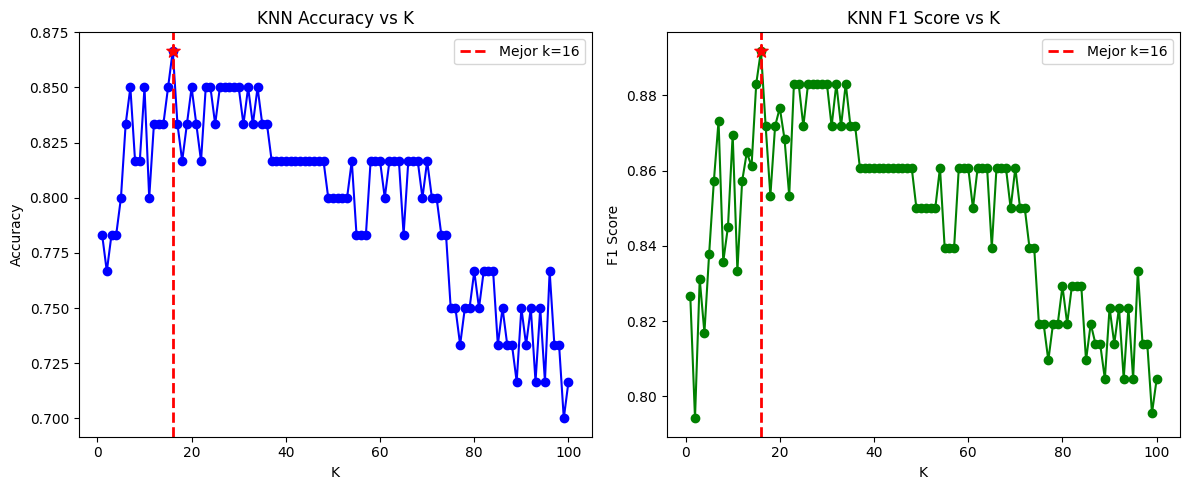

In [13]:
# Visualización de resultados
plt.figure(figsize=(12, 5))

# Gráfica de Accuracy vs K
plt.subplot(1, 2, 1)
plt.plot(range(1, 101), accuracies, marker='o', color='blue')
plt.axvline(x=best_k_acc, color='red', linestyle='--', linewidth=2, label=f'Mejor k={best_k_acc}')
plt.scatter([best_k_acc], [best_acc], color='red', s=100, zorder=2, marker='*')
plt.title('KNN Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de F1 Score vs K
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), f1_scores, marker='o', color='green')
plt.axvline(x=best_k_f1, color='red', linestyle='--', linewidth=2, label=f'Mejor k={best_k_f1}')
plt.scatter([best_k_f1], [best_f1], color='red', s=100, zorder=2, marker='*')
plt.title('KNN F1 Score vs K')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

---

# Problema 4

Repita el problema 3, pero utilice el modelo de `regresión logística` con sklearn. Compare los resultados con los anteriores. Además, anote los hiperparámetros de optimización que eligió y explique por qué.

### Librerías

In [14]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

### Carga de datos

In [15]:
file_path = "horse.csv"

# Obtenemos el DataFrame desde KaggleHub
df: pd.DataFrame = None
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "yasserh/horsesurvivalprognostication",
    file_path
)

### Preprocesamiento de Datos

In [16]:
# Convertir outcome a binario: 
# lived=1, died/euthanized=0
df['outcome_binary'] = (df['outcome'] == 'lived').astype(int)

# Eliminar columnas no relevantes para el modelo
cols_to_drop = ['outcome', 'hospital_number', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']
df = df.drop(columns=cols_to_drop)

# Separar features y target
X = df.drop('outcome_binary', axis=1)
y = df['outcome_binary']

In [17]:
# Separar columnas numéricas y categóricas
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Imputar valores faltantes
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

X[numeric_cols] = imputer_num.fit_transform(X[numeric_cols])
X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# Codificación one-hot para categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [18]:
# División dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=14, stratify=y
)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Conjunto de entrenamiento: {X_train_scaled.shape}")
print(f"Conjunto de prueba: {X_test_scaled.shape}")

Conjunto de entrenamiento: (239, 46)
Conjunto de prueba: (60, 46)


### Entrenamiento y Evaluación del Modelo

In [19]:
class LRModel:
    def __init__(self, C=1.0, max_iter=1000, class_weight=None, solver='lbfgs', random_state=14):
        self.C = C
        self.max_iter = max_iter
        self.class_weight = class_weight
        self.solver = solver
        self.random_state = random_state
        
        # Inicializar el modelo de regresión logística con hiperparámetros
        self.model = LogisticRegression(
            random_state=self.random_state, 
            C=self.C, 
            max_iter=self.max_iter,
            class_weight=self.class_weight,
            solver=self.solver,
        )
        self.scaler = StandardScaler()
    
    def fit(self, X_train, y_train):
        # Entrenamiento
        X_train_scaled = self.scaler.fit_transform(X_train)
        self.model.fit(X_train_scaled, y_train)
        # Metricas
        y_train_pred = self.model.predict(X_train_scaled)
        train_acc = self.model.score(X_train_scaled, y_train)
        train_f1 = f1_score(y_train, y_train_pred)
        return train_acc, train_f1
    
    def predict(self, X_test, y_test):
        # Predicción
        X_test_scaled = self.scaler.transform(X_test)
        y_pred = self.model.predict(X_test_scaled)
        # Métricas
        test_acc = self.model.score(X_test_scaled, y_test)
        test_f1 = f1_score(y_test, y_pred)
        return test_acc, test_f1
    

### Test 1: Modelo base

In [20]:
# Modelo baseline: sin regularización extra, sin ajuste de clases
model_baseline = LRModel(C=1.0, class_weight=None)
train_acc, train_f1 = model_baseline.fit(X_train, y_train)
test_acc, test_f1 = model_baseline.predict(X_test, y_test)

print(f"Train - Accuracy: {train_acc:.4f}, F1: {train_f1:.4f}")
print(f"Test  - Accuracy: {test_acc:.4f}, F1: {test_f1:.4f}")

Train - Accuracy: 0.8159, F1: 0.8472
Test  - Accuracy: 0.7667, F1: 0.8205


### Test 2: Variación de C (Regularización)

In [21]:
# Probar diferentes valores de C
C_values = [0.01, 0.1, 1, 10, 100]
results_C = []

print("Explorando diferentes valores de C:")
print("-"*70)
for C in C_values:
    model = LRModel(C=C)
    train_acc, train_f1 = model.fit(X_train, y_train)
    test_acc, test_f1 = model.predict(X_test, y_test)
    
    results_C.append({
        'C': C,
        'train_acc': train_acc,
        'train_f1': train_f1,
        'test_acc': test_acc,
        'test_f1': test_f1
    })
    
    print(f"C={C:>6} | Train F1: {train_f1:.4f} | Test F1: {test_f1:.4f} | Test Acc: {test_acc:.4f}")

# Encontrar mejor C
best_C_result = max(results_C, key=lambda x: x['test_f1'])
print("-"*70)
print(f"Mejor C = {best_C_result['C']} con Test F1 = {best_C_result['test_f1']:.4f}")

Explorando diferentes valores de C:
----------------------------------------------------------------------
C=  0.01 | Train F1: 0.8066 | Test F1: 0.8571 | Test Acc: 0.8167
C=   0.1 | Train F1: 0.8339 | Test F1: 0.8421 | Test Acc: 0.8000
C=     1 | Train F1: 0.8472 | Test F1: 0.8205 | Test Acc: 0.7667
C=    10 | Train F1: 0.8512 | Test F1: 0.8205 | Test Acc: 0.7667
C=   100 | Train F1: 0.8512 | Test F1: 0.8205 | Test Acc: 0.7667
----------------------------------------------------------------------
Mejor C = 0.01 con Test F1 = 0.8571


### Test 3: Impacto de class_weight='balanced'

In [22]:
# Comparar con y sin class_weight balanced
print("Comparación class_weight:")
print("-"*70)
print(f"{'Configuración':<15} | {'Train Acc':>10} | {'Train F1':>10} | {'Test Acc':>10} | {'Test F1':>10}")
print("-"*70)

# Sin balanceo
model_unbalanced = LRModel(C=1.0, class_weight=None)
train_acc_unbalanced, train_f1_unbalanced = model_unbalanced.fit(X_train, y_train)
test_acc_unbalanced, test_f1_unbalanced = model_unbalanced.predict(X_test, y_test)
print(f"{'Sin balanceo':<15} | {train_acc_unbalanced:>10.4f} | {train_f1_unbalanced:>10.4f} | {test_acc_unbalanced:>10.4f} | {test_f1_unbalanced:>10.4f}")

# Con balanceo
model_balanced = LRModel(C=1.0, class_weight='balanced')
train_acc_balanced, train_f1_balanced = model_balanced.fit(X_train, y_train)
test_acc_balanced, test_f1_balanced = model_balanced.predict(X_test, y_test)
print(f"{'Con balanced':<15} | {train_acc_balanced:>10.4f} | {train_f1_balanced:>10.4f} | {test_acc_balanced:>10.4f} | {test_f1_balanced:>10.4f}")
print("-"*70)

if test_f1_balanced > test_f1_unbalanced:
    best_class_weight = 'balanced'
else:
    best_class_weight = None

Comparación class_weight:
----------------------------------------------------------------------
Configuración   |  Train Acc |   Train F1 |   Test Acc |    Test F1
----------------------------------------------------------------------
Sin balanceo    |     0.8159 |     0.8472 |     0.7667 |     0.8205
Con balanced    |     0.8075 |     0.8296 |     0.8000 |     0.8333
----------------------------------------------------------------------


### Test 4: Diferentes solvers

In [23]:
# Comparar diferentes solvers
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
results_solvers = []

print("Comparación de diferentes solvers:")
print("-"*70)
print(f"{'Solver':<15} | {'Train Acc':>10} | {'Train F1':>10} | {'Test Acc':>10} | {'Test F1':>10}")
print("-"*70)

for solver in solvers:
    try:
        model = LRModel(C=1.0, solver=solver, max_iter=2000)
        train_acc, train_f1 = model.fit(X_train, y_train)
        test_acc, test_f1 = model.predict(X_test, y_test)
        
        results_solvers.append({
            'solver': solver,
            'train_acc': train_acc,
            'train_f1': train_f1,
            'test_acc': test_acc,
            'test_f1': test_f1
        })
        
        print(f"{solver:<15} | {train_acc:>10.4f} | {train_f1:>10.4f} | {test_acc:>10.4f} | {test_f1:>10.4f}")
    except Exception as e:
        print(f"{solver:<15} | Error: {str(e)[:60]}")

# Encontrar mejor solver
if results_solvers:
    best_solver = max(results_solvers, key=lambda x: x['test_f1'])
    print("-"*70)
    print(f"Mejor solver: {best_solver['solver']}")
    print(f"Test Acc: {best_solver['test_acc']:.4f}, Test F1: {best_solver['test_f1']:.4f}")

Comparación de diferentes solvers:
----------------------------------------------------------------------
Solver          |  Train Acc |   Train F1 |   Test Acc |    Test F1
----------------------------------------------------------------------
lbfgs           |     0.8159 |     0.8472 |     0.7667 |     0.8205
liblinear       |     0.8201 |     0.8502 |     0.7833 |     0.8312
newton-cg       |     0.8159 |     0.8472 |     0.7667 |     0.8205
sag             |     0.8159 |     0.8472 |     0.7667 |     0.8205
saga            |     0.8159 |     0.8472 |     0.7667 |     0.8205
----------------------------------------------------------------------
Mejor solver: liblinear
Test Acc: 0.7833, Test F1: 0.8312


### Test 5: Combinación óptima de hiperparámetros

In [24]:
# Usar las mejores configuraciones de cada test case
print("Combinaciones ganadoras de cada Test Case:")
print("-"*70)

# Obtener el mejor C del Test 2

print(f"Mejor C (Test 2): {best_C_result['C']}")
print(f"Mejor class_weight (Test 3): {best_class_weight}")
print(f"Mejor solver (Test 4): {best_solver['solver']}")

print("-"*70)
print("Modelo Final con combinación óptima:")
print("-"*70)

# Entrenar modelo con la mejor combinación
model_optimal = LRModel(
    C=best_C_result['C'], 
    class_weight=best_class_weight, 
    solver=best_solver['solver'], 
    max_iter=1000
)

train_acc, train_f1 = model_optimal.fit(X_train, y_train)
test_acc, test_f1 = model_optimal.predict(X_test, y_test)

print(f"Configuración: C={best_C_result['C']}, class_weight={best_class_weight}, solver='{best_solver['solver']}'")
print(f"Train: Accuracy={train_acc:.4f}, F1={train_f1:.4f}")
print(f"Test:  Accuracy={test_acc:.4f}, F1={test_f1:.4f}")


Combinaciones ganadoras de cada Test Case:
----------------------------------------------------------------------
Mejor C (Test 2): 0.01
Mejor class_weight (Test 3): balanced
Mejor solver (Test 4): liblinear
----------------------------------------------------------------------
Modelo Final con combinación óptima:
----------------------------------------------------------------------
Configuración: C=0.01, class_weight=balanced, solver='liblinear'
Train: Accuracy=0.7615, F1=0.7881
Test:  Accuracy=0.8167, F1=0.8406


---

# Problema 5

Considere el conjunto de datos de `beer.csv`. Cree un script con sklearn para resolver el problema de clasificación multiclase asociado con la clasificación de cervezas por estilo. Utilice el modelo KNN. Anote todas las suposiciones y operaciones de preprocesamiento de datos que realice. Investigue qué es una `matriz de confusión`. Luego, incorpórela a su análisis.

### Librerías

In [25]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

### Carga de datos

In [26]:
file_path = "beer.csv"

df: pd.DataFrame = None
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "ankurnapa/ankurs-beer-data-set",
    file_path
)

### Exploración de datos

In [27]:
df.head()

,Brew No.,OG,ABV,pH,IBU,style
0,1,11.5,4.2,4.20,14.0,Premium Lager
1,2,12.2,4.8,4.25,12.0,Premium Lager
2,3,13.0,5.0,3.80,13.0,Premium Lager
3,4,11.0,3.9,4.20,14.0,Premium Lager
4,5,12.0,4.2,3.90,12.0,Premium Lager


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brew No.  150 non-null    int64  
 1   OG        150 non-null    float64
 2   ABV       150 non-null    float64
 3   pH        150 non-null    float64
 4   IBU       150 non-null    float64
 5   style     150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
# Exploración de la variable objetivo
print(f"Dimensiones del dataset: {df.shape}")
print("Distribución de style:")
print(df['style'].value_counts())

Dimensiones del dataset: (150, 6)
Distribución de style:
style
Premium Lager    50
IPA              50
Light Lager      50
Name: count, dtype: int64


### Preprocesamiento de Datos

In [30]:
# Separar features y target
X = df.drop('style', axis=1)
y = df['style']

print(f"Shape inicial: {X.shape}")

# División train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=14, stratify=y
)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Conjunto de entrenamiento: {X_train_scaled.shape}")
print(f"Conjunto de prueba: {X_test_scaled.shape}")
print(f"Número de clases: {y.nunique()}")
print(f"Clases: {sorted(y.unique())}")

Shape inicial: (150, 5)
Conjunto de entrenamiento: (120, 5)
Conjunto de prueba: (30, 5)
Número de clases: 3
Clases: ['IPA', 'Light Lager', 'Premium Lager']


In [31]:
class KNNModelMulticlass:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.model = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.scaler = StandardScaler()
    
    def fit(self, X_train, y_train):
        # Entrenamiento
        X_train_scaled = self.scaler.fit_transform(X_train)
        self.model.fit(X_train_scaled, y_train)
        # Métricas
        y_train_pred = self.model.predict(X_train_scaled)
        train_acc = self.model.score(X_train_scaled, y_train)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        return train_acc, train_f1
    
    def predict(self, X_test, y_test):
        # Predicción
        X_test_scaled = self.scaler.transform(X_test)
        y_pred = self.model.predict(X_test_scaled)
        # Métricas
        test_acc = self.model.score(X_test_scaled, y_test)
        test_f1 = f1_score(y_test, y_pred, average='weighted')
        return y_pred, test_acc, test_f1

In [32]:
# Pruebas modelo KNN multiclase base
model = KNNModelMulticlass(n_neighbors=5)
train_acc, train_f1 = model.fit(X_train, y_train)
print(f"Train Accuracy: {train_acc:.4f}, Train F1 Score (weighted): {train_f1:.4f}")

y_pred, test_acc, test_f1 = model.predict(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test F1 Score (weighted): {test_f1:.4f}")

Train Accuracy: 1.0000, Train F1 Score (weighted): 1.0000
Test Accuracy: 1.0000, Test F1 Score (weighted): 1.0000


In [33]:
# Búsqueda del mejor k

# Listas para almacenar resultados
accuracies = []
f1_scores = []

# Variables para almacenar el mejor k según cada métrica
best_k_acc = 1
best_k_f1 = 1
best_f1 = 0
best_acc = 0

# Evaluar k desde 1 hasta 50
for k in range(1, 50):
    model = KNNModelMulticlass(n_neighbors=k)
    model.fit(X_train, y_train)
    _, test_acc, test_f1 = model.predict(X_test, y_test)
    accuracies.append(test_acc)
    f1_scores.append(test_f1)
    
    # Actualizar mejores k según métricas
    if test_f1 > best_f1:
        best_f1 = test_f1
        best_k_f1 = k
    if test_acc > best_acc:
        best_acc = test_acc
        best_k_acc = k

# Resultados  
print(f"Mejor k según Accuracy: {best_k_acc} (Accuracy: {best_acc:.4f})")
print(f"Mejor k según F1 Score: {best_k_f1} (F1 Score: {best_f1:.4f})")

Mejor k según Accuracy: 1 (Accuracy: 1.0000)
Mejor k según F1 Score: 1 (F1 Score: 1.0000)


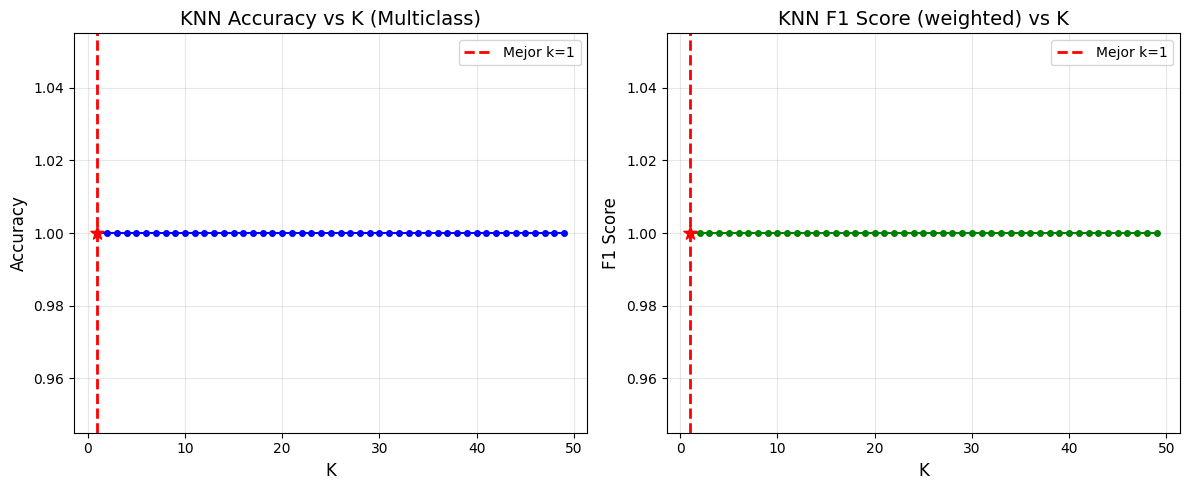

In [34]:
# Visualización de resultados
plt.figure(figsize=(12, 5))

# Gráfica de Accuracy vs K
plt.subplot(1, 2, 1)
plt.plot(range(1, 50), accuracies, marker='o', color='blue', markersize=4)
plt.axvline(x=best_k_acc, color='red', linestyle='--', linewidth=2, label=f'Mejor k={best_k_acc}')
plt.scatter([best_k_acc], [best_acc], color='red', s=100, zorder=2, marker='*')
plt.title('KNN Accuracy vs K (Multiclass)', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfica de F1 Score vs K
plt.subplot(1, 2, 2)
plt.plot(range(1, 50), f1_scores, marker='o', color='green', markersize=4)
plt.axvline(x=best_k_f1, color='red', linestyle='--', linewidth=2, label=f'Mejor k={best_k_f1}')
plt.scatter([best_k_f1], [best_f1], color='red', s=100, zorder=2, marker='*')
plt.title('KNN F1 Score (weighted) vs K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
# Entrenar modelo con el mejor k
best_model = KNNModelMulticlass(n_neighbors=best_k_f1)
train_acc, train_f1 = best_model.fit(X_train, y_train)
y_pred, test_acc, test_f1 = best_model.predict(X_test, y_test)

print(f"Modelo final con k={best_k_f1}")
print(f"Train Accuracy: {train_acc:.4f}, Train F1: {train_f1:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Test F1: {test_f1:.4f}")

Modelo final con k=1
Train Accuracy: 1.0000, Train F1: 1.0000
Test Accuracy: 1.0000, Test F1: 1.0000


<Figure size 1000x800 with 0 Axes>

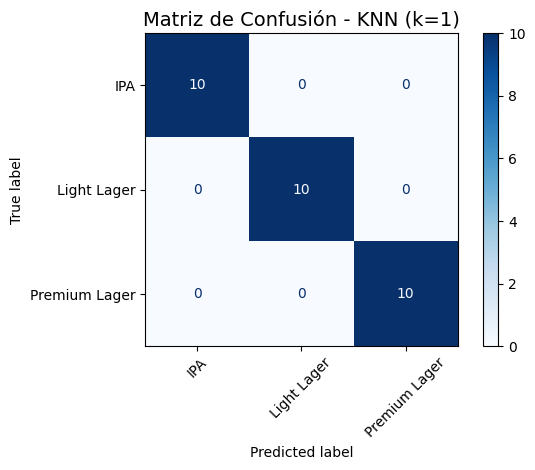

In [36]:
# Generar matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
plt.title(f'Matriz de Confusión - KNN (k={best_k_f1})', fontsize=14)
plt.tight_layout()
plt.show()

---

# Problema 6

Busque los términos "One Vs One Classifie" y "One Vs Rest Classifie". Luego, repita el problema 5 usando sklearn para los dos enfoques mencionados. Anote todas las suposiciones y conclusiones.

### Librerías

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### Carga de datos

In [38]:
# Cargar datos
file_path = "beer.csv"

df: pd.DataFrame = None
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "ankurnapa/ankurs-beer-data-set",
    file_path
)

### Preprocesamiento de Datos

In [39]:
# Separar features y target
X = df.drop('style', axis=1)
y = df['style']

# División train-test (misma configuración del problema 5)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=14, stratify=y
)

print(f"Dataset: {X.shape}")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Número de clases: {y.nunique()}")
print(f"Clases: {sorted(y.unique())}")

Dataset: (150, 5)
Train: (120, 5), Test: (30, 5)
Número de clases: 3
Clases: ['IPA', 'Light Lager', 'Premium Lager']


### Entrenamiento y Evaluación del Modelo

In [40]:
class KNNMulticlassStrategies:
    def __init__(self, n_neighbors=5, strategy='standard'):
        self.n_neighbors = n_neighbors
        self.strategy = strategy
        self.scaler = StandardScaler()
        self.model = None
        
        # Crear modelo según la estrategia
        if strategy == 'standard':
            self.model = KNeighborsClassifier(n_neighbors=n_neighbors)
        elif strategy == 'ovr':
            self.model = OneVsRestClassifier(
                KNeighborsClassifier(n_neighbors=n_neighbors)
            )
        elif strategy == 'ovo':
            self.model = OneVsOneClassifier(
                KNeighborsClassifier(n_neighbors=n_neighbors)
            )
        else:
            raise ValueError("strategy debe ser 'standard', 'ovr' o 'ovo'")
    
    def fit(self, X_train, y_train):
        # Entrenamiento
        X_train_scaled = self.scaler.fit_transform(X_train)
        self.model.fit(X_train_scaled, y_train)
        # Métricas
        y_train_pred = self.model.predict(X_train_scaled)
        train_acc = accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        return train_acc, train_f1
    
    def predict(self, X_test, y_test):
        # Predicciones
        X_test_scaled = self.scaler.transform(X_test)
        y_pred = self.model.predict(X_test_scaled)
        # Métricas
        test_acc = accuracy_score(y_test, y_pred)
        test_f1 = f1_score(y_test, y_pred, average='weighted')
        return y_pred, test_acc, test_f1

In [41]:
# Definir estrategias a comparar
strategies = ['standard', 'ovr', 'ovo']
k_value = 5  # Usar k=5 como baseline

results = {}
predictions = {}

print(f"{'Estrategia':<12} | {'Train Acc':>10} | {'Train F1':>10} | {'Test Acc':>10} | {'Test F1':>10}")
print("-"*65)

for strategy in strategies:
    # Crear y entrenar modelo
    model = KNNMulticlassStrategies(n_neighbors=k_value, strategy=strategy)
    train_acc, train_f1 = model.fit(X_train, y_train)
    y_pred, test_acc, test_f1 = model.predict(X_test, y_test)
    
    # Guardar resultados
    results[strategy] = {
        'estrategia': strategy,
        'model': model,
        'train_acc': train_acc,
        'train_f1': train_f1,
        'test_acc': test_acc,
        'test_f1': test_f1,
    }
    predictions[strategy] = y_pred
    
    # Mostrar resultados
    print(f"{strategy:<12} | {train_acc:>10.4f} | {train_f1:>10.4f} | {test_acc:>10.4f} | {test_f1:>10.4f}")

Estrategia   |  Train Acc |   Train F1 |   Test Acc |    Test F1
-----------------------------------------------------------------
standard     |     1.0000 |     1.0000 |     1.0000 |     1.0000
ovr          |     1.0000 |     1.0000 |     1.0000 |     1.0000
ovo          |     1.0000 |     1.0000 |     1.0000 |     1.0000


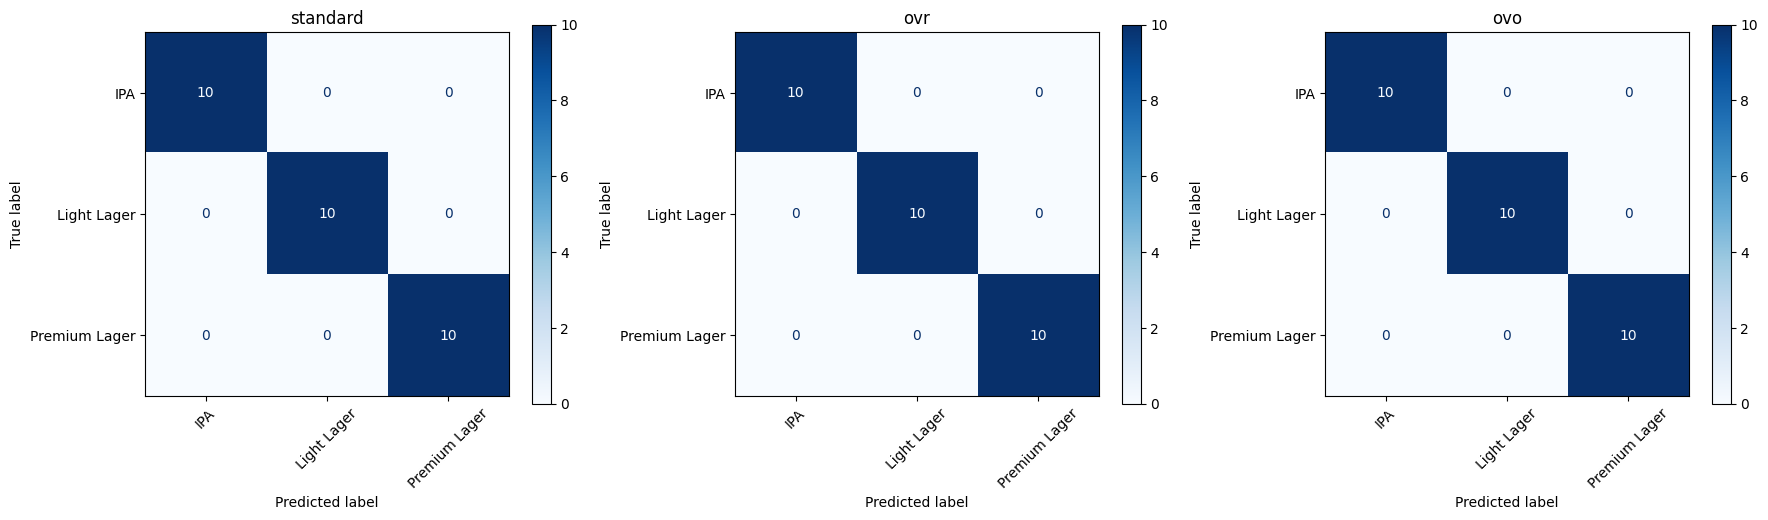

In [42]:
# Visualizar matrices de confusión para las tres estrategias
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, strategy in enumerate(strategies):
    y_pred = predictions[strategy]
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d', xticks_rotation=45)
    
    axes[idx].set_title(f'{strategy}',)

plt.tight_layout()
plt.show()

---

# Problema 7

Considere la ecuación cuadrática general.

$ax^2+bx+c = 0$

Esfuércese por clasificar las raíces de la ecuación anterior en función de sus coeficientes. Para simplificar, debe fijar el dominio de x y proponer un dominio adecuado para los coeficientes. Escriba todas sus suposiciones y muestre sus hallazgos mediante gráficos.

### Librerías

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Generacion del Dataset

In [44]:
np.random.seed(14)

def generate_quadratic_data(n_samples=5000):
    data = []
    
    # Distribución objetivo por clase
    samples_per_class = n_samples // 3
    
    # Clase 2: Raíces reales distintas (Δ > 0)
    # Generar coeficientes que garanticen Δ > 0
    for _ in range(samples_per_class):
        a = np.random.uniform(-10, 10)
        while abs(a) < 0.1:  # Evitar a cercano a 0
            a = np.random.uniform(-10, 10)
        
        b = np.random.uniform(-10, 10)
        # Elegir c tal que b² - 4ac > 0
        max_c = (b**2) / (4 * abs(a)) - 0.1
        c = np.random.uniform(-10, min(10, max_c))
        
        discriminant = b**2 - 4*a*c
        if discriminant > 0:
            data.append([a, b, c, 2])
    
    # Clase 1: Raíz real doble (Δ ≈ 0)
    # Generar coeficientes que garanticen Δ ≈ 0
    for _ in range(samples_per_class):
        a = np.random.uniform(-10, 10)
        while abs(a) < 0.1:
            a = np.random.uniform(-10, 10)
        
        b = np.random.uniform(-10, 10)
        # c = b² / 4a para que Δ = 0
        c = (b**2) / (4 * a)
        
        # Añadir pequeña perturbación para hacerlo más realista
        c += np.random.uniform(-0.05, 0.05)
        
        data.append([a, b, c, 1])
    
    # Clase 0: Raíces complejas (Δ < 0)
    # Generar coeficientes que garanticen Δ < 0
    for _ in range(samples_per_class):
        a = np.random.uniform(-10, 10)
        while abs(a) < 0.1:
            a = np.random.uniform(-10, 10)
        
        b = np.random.uniform(-10, 10)
        # Elegir c tal que b² - 4ac < 0
        min_c = (b**2) / (4 * abs(a)) + 0.1
        c = np.random.uniform(min(min_c, 10), 10)
        
        discriminant = b**2 - 4*a*c
        if discriminant < 0:
            data.append([a, b, c, 0])
    
    # Crear DataFrame
    df = pd.DataFrame(data, columns=['a', 'b', 'c', 'root_type'])
    
    # Calcular discriminante para verificación
    df['discriminant'] = df['b']**2 - 4*df['a']*df['c']
    
    return df

# Generar dataset
df = generate_quadratic_data(n_samples=6000)

print("Dataset generado:")
print(f"Forma: {df.shape}")

Dataset generado:
Forma: (4258, 5)


### Preprocesamiento de Datos

In [45]:
# Separar features y target
X = df[['a', 'b', 'c']]
y = df['root_type']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=14, stratify=y
)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Conjunto de entrenamiento: {X_train_scaled.shape}")
print(f"Conjunto de prueba: {X_test_scaled.shape}")
print(f"Número de clases: {y.nunique()}")
print(f"Distribución en train:\n{y_train.value_counts().sort_index()}")
print(f"Distribución en test:\n{y_test.value_counts().sort_index()}")


Conjunto de entrenamiento: (3406, 3)
Conjunto de prueba: (852, 3)
Número de clases: 3
Distribución en train:
root_type
0     753
1    1600
2    1053
Name: count, dtype: int64
Distribución en test:
root_type
0    188
1    400
2    264
Name: count, dtype: int64


### Entrenamiento y Evaluación del Modelo

In [46]:
# Clases para modelos

class KNNQuadraticClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.model = KNeighborsClassifier(n_neighbors=n_neighbors)
        self.scaler = StandardScaler()
    
    def fit(self, X_train, y_train):
        X_train_scaled = self.scaler.fit_transform(X_train)
        self.model.fit(X_train_scaled, y_train)
        y_train_pred = self.model.predict(X_train_scaled)
        train_acc = accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        return train_acc, train_f1
    
    def predict(self, X_test, y_test):
        X_test_scaled = self.scaler.transform(X_test)
        y_pred = self.model.predict(X_test_scaled)
        test_acc = accuracy_score(y_test, y_pred)
        test_f1 = f1_score(y_test, y_pred, average='weighted')
        return y_pred, test_acc, test_f1

class LRQuadraticClassifier:
    def __init__(self, C=1.0, max_iter=1000, solver='lbfgs', random_state=14):
        self.C = C
        self.max_iter = max_iter
        self.solver = solver
        self.random_state = random_state
        self.model = LogisticRegression(
            C=C, 
            max_iter=max_iter, 
            solver=solver, 
            random_state=random_state,
            multi_class='multinomial'
        )
        self.scaler = StandardScaler()
    
    def fit(self, X_train, y_train):
        X_train_scaled = self.scaler.fit_transform(X_train)
        self.model.fit(X_train_scaled, y_train)
        y_train_pred = self.model.predict(X_train_scaled)
        train_acc = accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        return train_acc, train_f1
    
    def predict(self, X_test, y_test):
        X_test_scaled = self.scaler.transform(X_test)
        y_pred = self.model.predict(X_test_scaled)
        test_acc = accuracy_score(y_test, y_pred)
        test_f1 = f1_score(y_test, y_pred, average='weighted')
        return y_pred, test_acc, test_f1

# ===== KNN: Búsqueda del mejor k =====
print("="*70)
print("KNN - Búsqueda del mejor k")
print("="*70)

accuracies_knn = []
f1_scores_knn = []
best_k = 1
best_f1_knn = 0

for k in range(1, 51):
    model = KNNQuadraticClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    _, test_acc, test_f1 = model.predict(X_test, y_test)
    accuracies_knn.append(test_acc)
    f1_scores_knn.append(test_f1)
    
    if test_f1 > best_f1_knn:
        best_f1_knn = test_f1
        best_k = k

print(f"Mejor k: {best_k} con F1 Score: {best_f1_knn:.4f}")

# ===== Regresión Logística: Búsqueda del mejor C =====
print("\n" + "="*70)
print("Regresión Logística - Búsqueda del mejor C")
print("="*70)

C_values = [0.01, 0.1, 1, 10, 100]
results_lr = []
best_C = 1.0
best_f1_lr = 0

for C in C_values:
    model = LRQuadraticClassifier(C=C)
    train_acc, train_f1 = model.fit(X_train, y_train)
    y_pred, test_acc, test_f1 = model.predict(X_test, y_test)
    
    results_lr.append({
        'C': C,
        'test_acc': test_acc,
        'test_f1': test_f1
    })
    
    if test_f1 > best_f1_lr:
        best_f1_lr = test_f1
        best_C = C
    
    print(f"C={C:>6} | Test Acc: {test_acc:.4f} | Test F1: {test_f1:.4f}")

print(f"\nMejor C: {best_C} con F1 Score: {best_f1_lr:.4f}")

# ===== Modelos finales =====
print("\n" + "="*70)
print("Comparación Final")
print("="*70)

# KNN con mejor k
knn_final = KNNQuadraticClassifier(n_neighbors=best_k)
train_acc_knn, train_f1_knn = knn_final.fit(X_train, y_train)
y_pred_knn, test_acc_knn, test_f1_knn = knn_final.predict(X_test, y_test)

# LR con mejor C
lr_final = LRQuadraticClassifier(C=best_C)
train_acc_lr, train_f1_lr = lr_final.fit(X_train, y_train)
y_pred_lr, test_acc_lr, test_f1_lr = lr_final.predict(X_test, y_test)

print(f"\n{'Modelo':<20} | {'Train Acc':>10} | {'Train F1':>10} | {'Test Acc':>10} | {'Test F1':>10}")
print("-"*70)
print(f"{'KNN (k=' + str(best_k) + ')':<20} | {train_acc_knn:>10.4f} | {train_f1_knn:>10.4f} | {test_acc_knn:>10.4f} | {test_f1_knn:>10.4f}")
print(f"{'LR (C=' + str(best_C) + ')':<20} | {train_acc_lr:>10.4f} | {train_f1_lr:>10.4f} | {test_acc_lr:>10.4f} | {test_f1_lr:>10.4f}")

# Guardar predicciones
predictions = {
    'knn': y_pred_knn,
    'lr': y_pred_lr
}

KNN - Búsqueda del mejor k
Mejor k: 1 con F1 Score: 0.9037

Regresión Logística - Búsqueda del mejor C
C=  0.01 | Test Acc: 0.6303 | Test F1: 0.6255
C=   0.1 | Test Acc: 0.6420 | Test F1: 0.6390
C=     1 | Test Acc: 0.6467 | Test F1: 0.6441
C=    10 | Test Acc: 0.6467 | Test F1: 0.6441
C=   100 | Test Acc: 0.6467 | Test F1: 0.6441

Mejor C: 1 con F1 Score: 0.6441

Comparación Final

Modelo               |  Train Acc |   Train F1 |   Test Acc |    Test F1
----------------------------------------------------------------------
KNN (k=1)            |     1.0000 |     1.0000 |     0.9038 |     0.9037
LR (C=1)             |     0.6436 |     0.6391 |     0.6467 |     0.6441


/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_mo

### Resultados

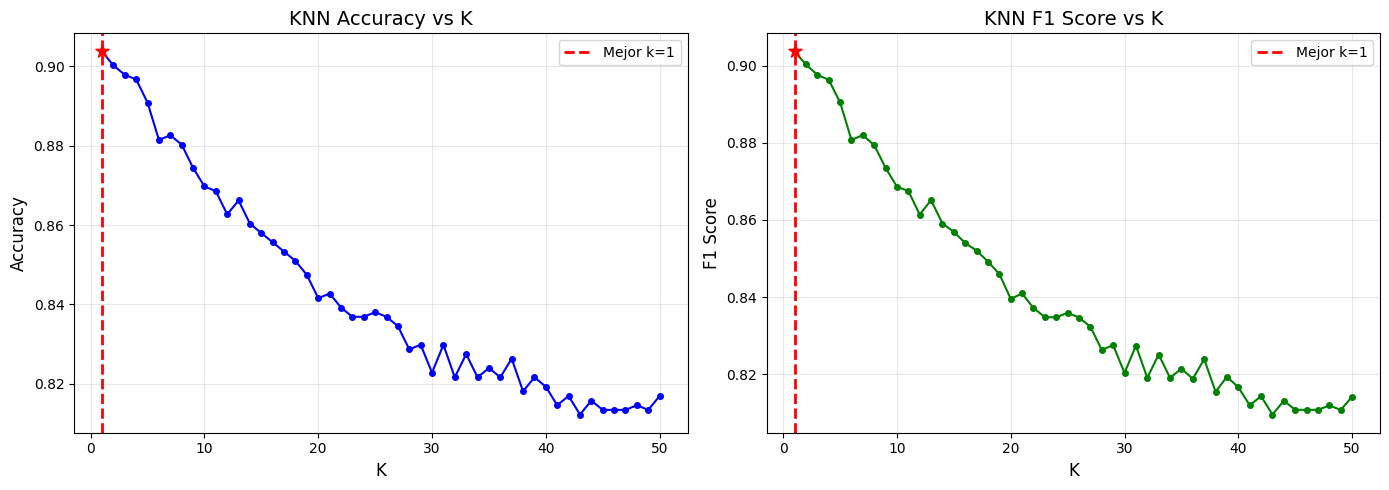

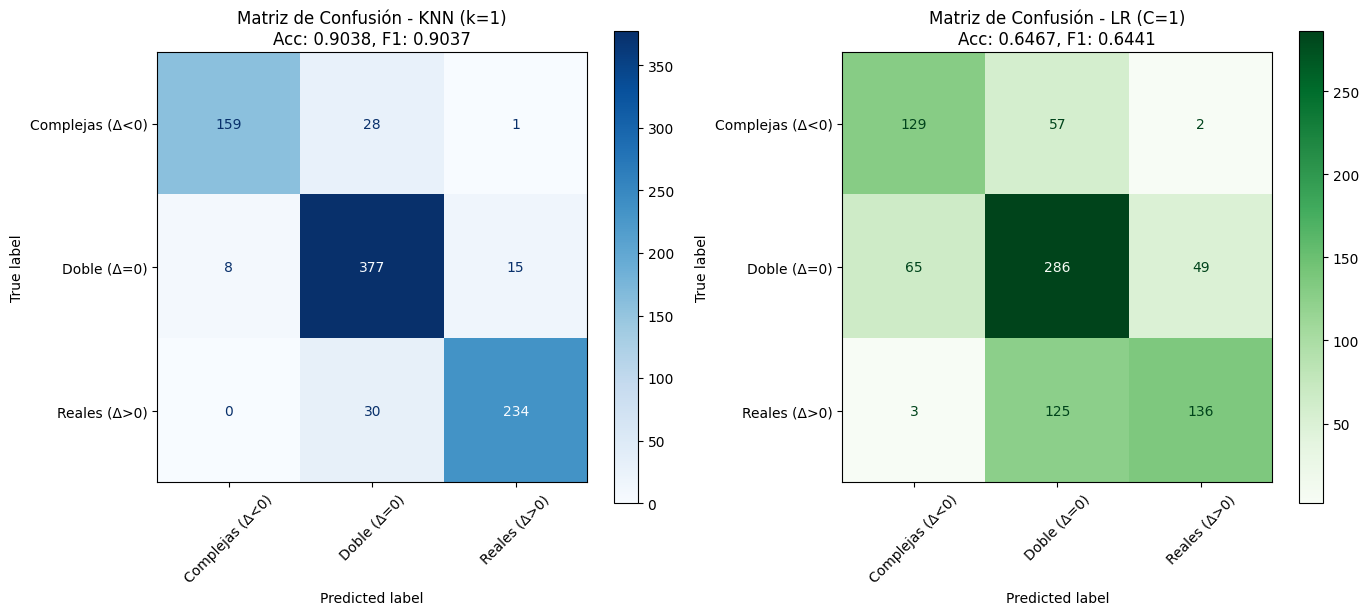

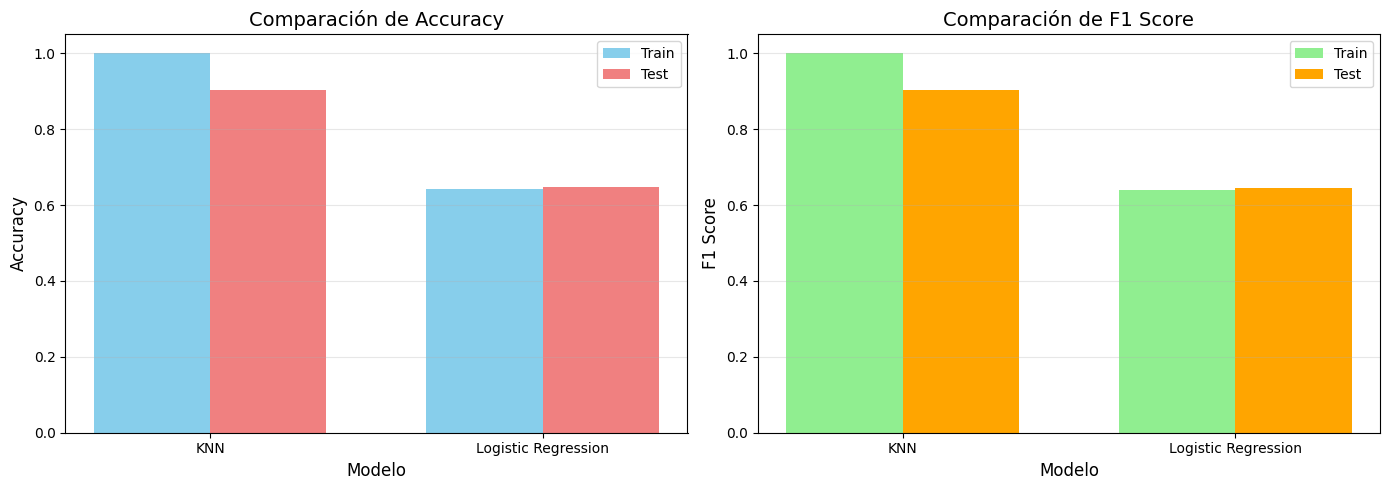

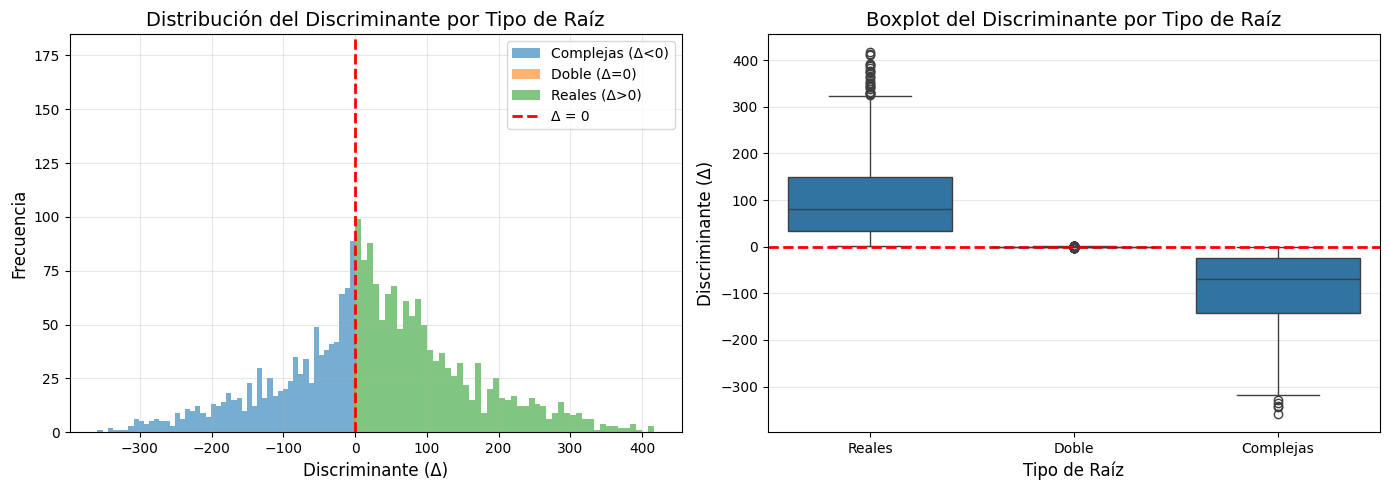

In [47]:
# Visualización 1: Performance de KNN según k
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy vs k
axes[0].plot(range(1, 51), accuracies_knn, marker='o', color='blue', markersize=4)
axes[0].axvline(x=best_k, color='red', linestyle='--', linewidth=2, label=f'Mejor k={best_k}')
axes[0].scatter([best_k], [accuracies_knn[best_k-1]], color='red', s=100, zorder=2, marker='*')
axes[0].set_title('KNN Accuracy vs K', fontsize=14)
axes[0].set_xlabel('K', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# F1 Score vs k
axes[1].plot(range(1, 51), f1_scores_knn, marker='o', color='green', markersize=4)
axes[1].axvline(x=best_k, color='red', linestyle='--', linewidth=2, label=f'Mejor k={best_k}')
axes[1].scatter([best_k], [f1_scores_knn[best_k-1]], color='red', s=100, zorder=2, marker='*')
axes[1].set_title('KNN F1 Score vs K', fontsize=14)
axes[1].set_xlabel('K', fontsize=12)
axes[1].set_ylabel('F1 Score', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualización 2: Matrices de Confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

class_labels = ['Complejas (Δ<0)', 'Doble (Δ=0)', 'Reales (Δ>0)']

# Matriz de confusión KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_labels)
disp_knn.plot(ax=axes[0], cmap='Blues', values_format='d', xticks_rotation=45)
axes[0].set_title(f'Matriz de Confusión - KNN (k={best_k})\nAcc: {test_acc_knn:.4f}, F1: {test_f1_knn:.4f}', fontsize=12)

# Matriz de confusión LR
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=class_labels)
disp_lr.plot(ax=axes[1], cmap='Greens', values_format='d', xticks_rotation=45)
axes[1].set_title(f'Matriz de Confusión - LR (C={best_C})\nAcc: {test_acc_lr:.4f}, F1: {test_f1_lr:.4f}', fontsize=12)

plt.tight_layout()
plt.show()

# Visualización 3: Comparación de métricas
metrics_comparison = pd.DataFrame({
    'Modelo': ['KNN', 'Logistic Regression'],
    'Train Accuracy': [train_acc_knn, train_acc_lr],
    'Test Accuracy': [test_acc_knn, test_acc_lr],
    'Train F1': [train_f1_knn, train_f1_lr],
    'Test F1': [test_f1_knn, test_f1_lr]
})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
x = np.arange(len(metrics_comparison))
width = 0.35
axes[0].bar(x - width/2, metrics_comparison['Train Accuracy'], width, label='Train', color='skyblue')
axes[0].bar(x + width/2, metrics_comparison['Test Accuracy'], width, label='Test', color='lightcoral')
axes[0].set_xlabel('Modelo', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Comparación de Accuracy', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_comparison['Modelo'])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# F1 Score comparison
axes[1].bar(x - width/2, metrics_comparison['Train F1'], width, label='Train', color='lightgreen')
axes[1].bar(x + width/2, metrics_comparison['Test F1'], width, label='Test', color='orange')
axes[1].set_xlabel('Modelo', fontsize=12)
axes[1].set_ylabel('F1 Score', fontsize=12)
axes[1].set_title('Comparación de F1 Score', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(metrics_comparison['Modelo'])
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Visualización 4: Distribución del discriminante por clase
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
for class_type in [0, 1, 2]:
    subset = df[df['root_type'] == class_type]['discriminant']
    axes[0].hist(subset, bins=50, alpha=0.6, label=class_labels[class_type])

axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Δ = 0')
axes[0].set_xlabel('Discriminante (Δ)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución del Discriminante por Tipo de Raíz', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
df_plot = df.copy()
df_plot['root_type_label'] = df_plot['root_type'].map({
    0: 'Complejas',
    1: 'Doble',
    2: 'Reales'
})
sns.boxplot(data=df_plot, x='root_type_label', y='discriminant', ax=axes[1])
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Tipo de Raíz', fontsize=12)
axes[1].set_ylabel('Discriminante (Δ)', fontsize=12)
axes[1].set_title('Boxplot del Discriminante por Tipo de Raíz', fontsize=14)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()